# Plotting Chicago COVID cases using data from the [Chicago Data Portal](https://data.cityofchicago.org/)

See the data/ directory for more information about this data set.  

Note: if you are working from the eetiff conda environment, you will need to install pandas and geopandas
```
$ conda activate eetiff
$ conda install --channel conda-forge geopandas pandas
```

In [7]:
import rasterio
from rasterio.plot import show as showRasterio

import pandas as pd
import geopandas as gpd

import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('data/COVID-19_Cases__Tests__and_Deaths_by_ZIP_Code_fix.csv')
use = df.loc[(df['Week Number'] == 30)] #as a test
gdf = gpd.GeoDataFrame(use, geometry=gpd.points_from_xy(use['longitude'], use['latitude']))

In [33]:
zips = gpd.read_file('data/Boundaries_ZIP_Codes/geo_export_94cfa385-03be-4b00-b827-c9e4fdd73a8f.shp')

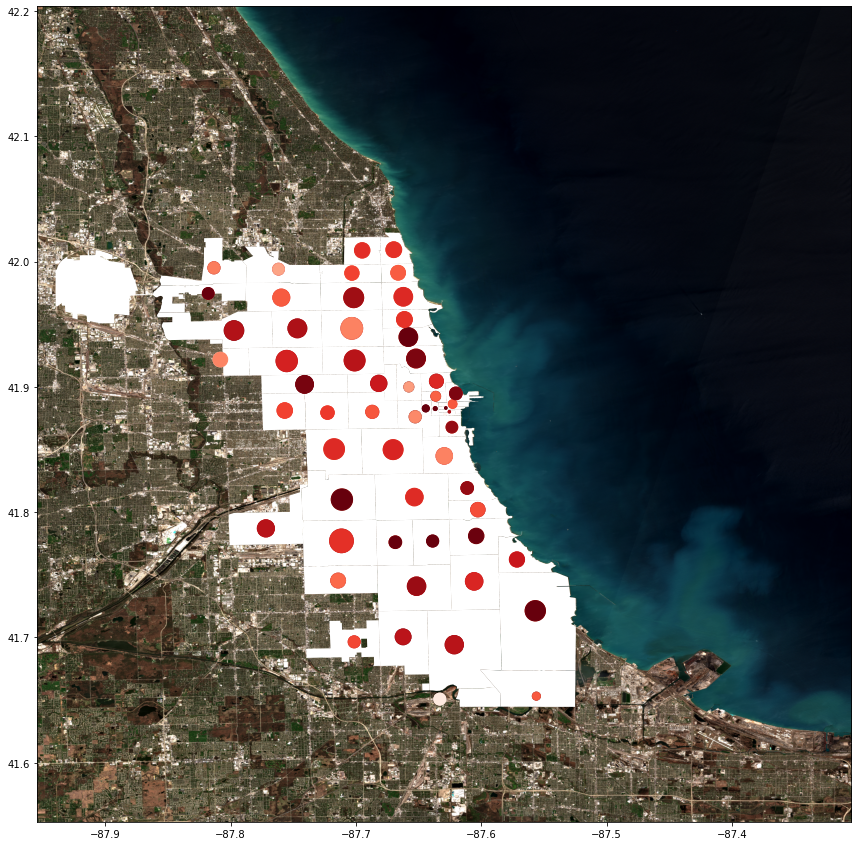

In [34]:
f,ax = plt.subplots(figsize=(15,15))

chicago = rasterio.open('../ChicagoGeoTIFF.tif')
showRasterio(chicago.read(), ax = ax, transform=chicago.transform)

zips.plot(ax = ax, color='white', zorder=3)

ms = use['Population']/200.

cmap = cm.get_cmap('Reds')
co = cmap(use['Cases - Weekly']/use['Population']*1000)
gdf.plot(ax = ax, color=co, zorder=3, markersize=ms)

chicago.close()

In [28]:
use['Cases - Weekly']/use['Population']*1000

95      0.740147
107     0.890215
212     0.805127
224     0.577437
276     0.786920
          ...   
5346    0.851789
5374    0.000000
5387    0.000000
5417    1.223765
5427    0.829002
Length: 118, dtype: float64